In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ^GSPC.csv to ^GSPC.csv


In [37]:
S_P = pd.read_csv("^GSPC.csv")
S_P

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-11-29,1257.459961,1266.180054,1257.459961,1257.479980,1257.479980,2268340000
1,2005-11-30,1257.479980,1260.930054,1249.390015,1249.479980,1249.479980,2374690000
2,2005-12-01,1249.479980,1266.170044,1249.479980,1264.670044,1264.670044,2614830000
3,2005-12-02,1264.670044,1266.849976,1261.420044,1265.079956,1265.079956,2125580000
4,2005-12-05,1265.079956,1265.079956,1258.119995,1262.089966,1262.089966,2325840000
...,...,...,...,...,...,...,...
3771,2020-11-20,3579.310059,3581.229980,3556.850098,3557.540039,3557.540039,4218970000
3772,2020-11-23,3566.820068,3589.810059,3552.770020,3577.590088,3577.590088,5036290000
3773,2020-11-24,3594.520020,3642.310059,3594.520020,3635.409912,3635.409912,6267570000
3774,2020-11-25,3635.500000,3635.500000,3617.760010,3629.649902,3629.649902,4902560000


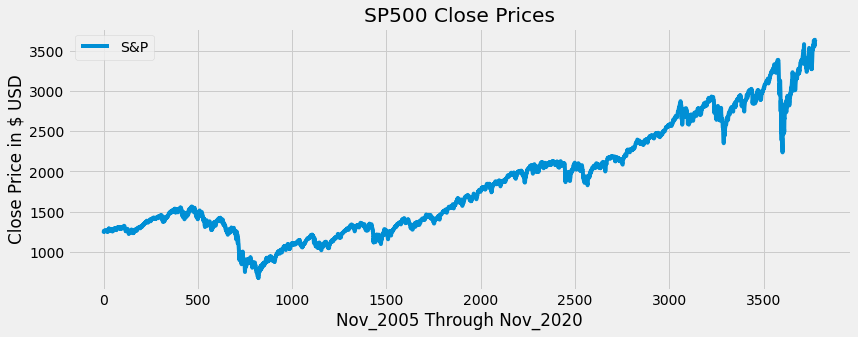

In [38]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(S_P['Close'], label="S&P")
plt.title('SP500 Close Prices')
plt.xlabel('Nov_2005 Through Nov_2020')
plt.ylabel('Close Price in $ USD')
plt.legend(loc='upper left')
plt.show()

In [39]:
SMA30 = pd.DataFrame()
SMA30['Close'] = S_P['Close'].rolling(window=30).mean()
SMA30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3771,3374.421401
3772,3378.897202
3773,3383.454102
3774,3388.297400


In [40]:
SMA100 = pd.DataFrame()
SMA100['Close'] = S_P['Close'].rolling(window=100).mean()
SMA100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3771,3146.605648
3772,3147.733148
3773,3149.121448
3774,3150.372448


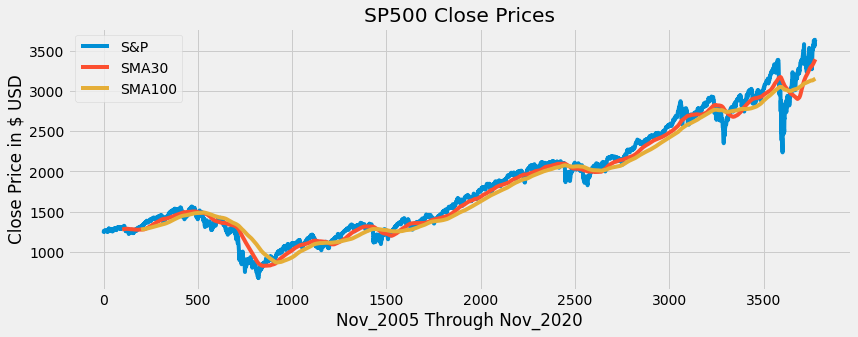

In [41]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(S_P['Close'], label="S&P")
plt.plot(SMA30['Close'], label = 'SMA30')
plt.plot(SMA100['Close'], label = 'SMA100')
plt.title('SP500 Close Prices')
plt.xlabel('Nov_2005 Through Nov_2020')
plt.ylabel('Close Price in $ USD')
plt.legend(loc='upper left')
plt.show()

In [47]:
data = pd.DataFrame()
data['S_P'] = S_P['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data

,S_P,SMA30,SMA100
0,1257.479980,NaN,NaN
1,1249.479980,NaN,NaN
2,1264.670044,NaN,NaN
3,1265.079956,NaN,NaN
4,1262.089966,NaN,NaN
...,...,...,...
3771,3557.540039,3374.421401,3146.605648
3772,3577.590088,3378.897202,3147.733148
3773,3635.409912,3383.454102,3149.121448
3774,3629.649902,3388.297400,3150.372448


In [54]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['S_P'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['S_P'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else: 
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [55]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

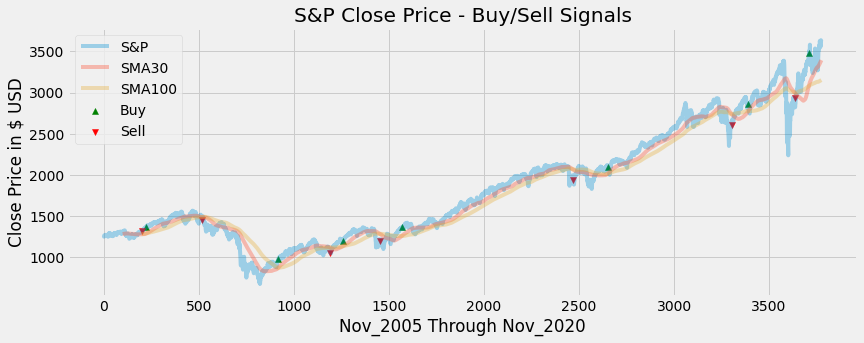

In [57]:
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['S_P'], label = 'S&P', alpha=0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha=0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker='^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker='v', color = 'red')
plt.title('S&P Close Price - Buy/Sell Signals')
plt.xlabel('Nov_2005 Through Nov_2020')
plt.ylabel('Close Price in $ USD')
plt.legend(loc='upper left')
plt.show()
%matplotlib inline

In [33]:
data.tail()

,S_P,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
3771,3557.540039,3557.540039,3557.540039,NaN,NaN
3772,3577.590088,3577.590088,3577.590088,NaN,NaN
3773,3635.409912,3635.409912,3635.409912,NaN,NaN
3774,3629.649902,3629.649902,3629.649902,NaN,NaN
3775,3638.350098,3638.350098,3638.350098,NaN,NaN
